# Import Required Libraries


In [97]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing libraries
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge # RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Model Evaluation
from sklearn.metrics import mean_squared_error

# Filter Warnings
import warnings
warnings.filterwarnings('ignore')


# Data Wrangling

In [16]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df2 = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df["sex"] = pd.Categorical(df["sex"])
df["smoker"] = pd.Categorical(df["smoker"])
df["region"] = pd.Categorical(df["region"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


# Exploratory Data Analysis

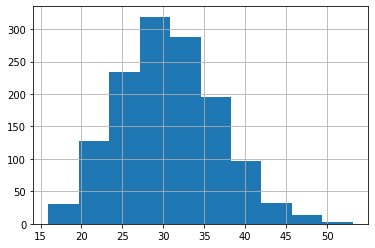

In [121]:
# Distribution of BMI (Body Mass Index)
# The BMI is Normally distributed and Unimodal
df['bmi'].hist();

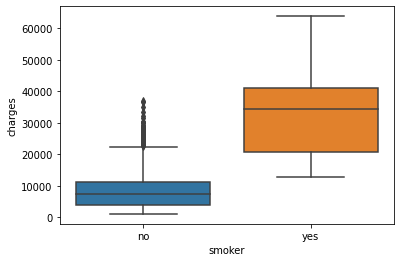

In [122]:
# Examine the relationship between “smoker” and “charges”
# Charges is higher for smokers compared to the non-smokers which is as expected
sns.boxplot(x="smoker", y="charges", data=df);

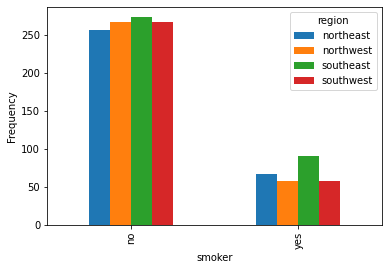

In [123]:
# Examine the relationship between “smoker” and “region”.
# Generally smokers are fewer compared to non-smokers but SouthEast has most numbers of smokers southwest has the fewest 
smoker_region = df.groupby(["smoker", "region"]).size()
# smoker_region.reset_index(name="count")
smoker_region.unstack().plot(kind="bar", ylabel="Frequency");

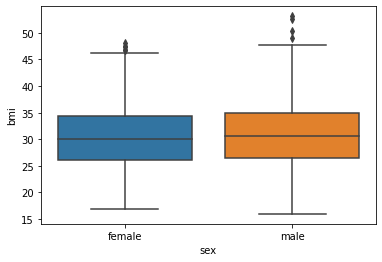

In [124]:
# Examine the relationship between “bmi” and “sex”.
# There is no distinctive relationship between sex and bmi
sns.boxplot(x="sex", y="bmi", data=df);

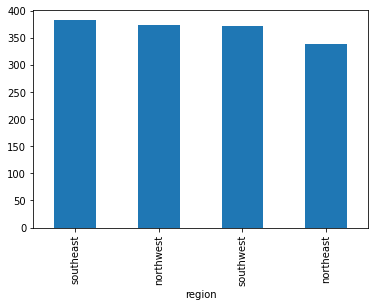

In [125]:
# Find the "region" with the most "children".
# Southeast occupants have the highest total number of children and Northeast have the lowest
children_region = df.groupby(["region"])["children"].sum()
children_region.sort_values(ascending=False).plot(kind="bar");

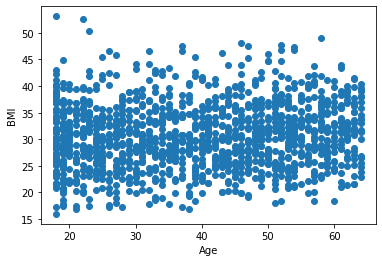

In [126]:
# Examine the relationship between “age” and “bmi”.
# There is no relationship between age and bmi
plt.scatter(df["age"], df["bmi"])
plt.xlabel("Age")
plt.ylabel("BMI");

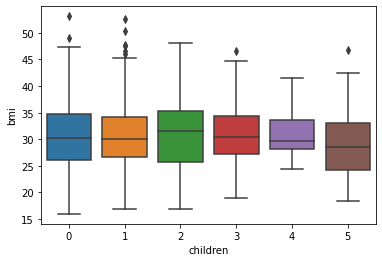

In [ ]:
# Examine the relationship between “bmi” and “children”.
sns.boxplot(x="children", y="bmi", data=df);

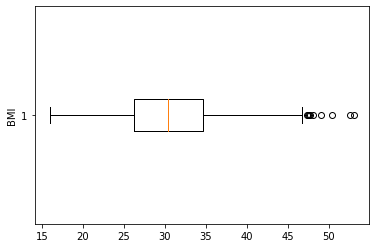

In [ ]:
# Is there an outlier in the "bmi" variable? Please review.
plt.boxplot(df["bmi"], vert=False)
plt.ylabel("BMI");

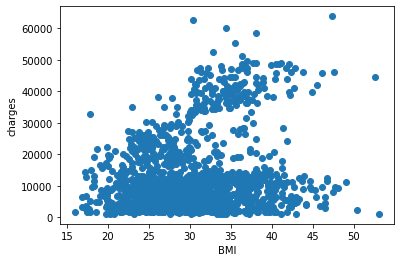

In [ ]:
# Examine the relationship between “bmi” and “charges”.
plt.scatter(df["bmi"], df["charges"])
plt.ylabel("charges")
plt.xlabel("BMI");

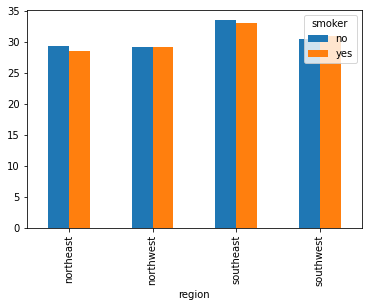

In [ ]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
reg_smok_bmi = df.groupby(["region", "smoker"])["bmi"].mean()
reg_smok_bmi.unstack().plot(kind="bar");

# Data Prepocessing

## Label Encoding

In [20]:
df_obj = pd.get_dummies(df, drop_first=True)
df_obj.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Train Test Split

In [21]:
target = 'charges'
X = df_obj.drop(columns=target)
y= df_obj[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
888,22,39.500,0,1,0,0,0,1
531,62,31.730,0,0,0,0,0,0
152,32,37.145,3,0,0,0,0,0
1006,28,29.260,2,1,0,0,0,0
848,27,24.100,0,0,0,0,0,1


## Standardization

In [66]:
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
sc_X_test = sc_X.transform(X_test)
sc_y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

# Model Selection


In [44]:
# Evaluation sheet
eval_sheet = {}
eval_sheet

{}

In [84]:
eval_sheet

{'Linear Regressor': 79.32,
 'Decision Tree Regressor': 75.92,
 'Random Forest Regressor': 86.23,
 'Lasso Regressor': 79.32,
 'K-Nearest Neighbors Regressor': 15.77,
 'Ridge Regressor': 79.29,
 'Support Vector Regressor': -2.31,
 'Lasso Standardized Regressor': -0.06,
 'KNN Standardized Regressor': 81.52,
 'SVR Standardized Regressor': 87.85}

## Linear Regression

In [45]:
model_lr = LinearRegression()
lrScores = cross_validate(model_lr, X_train, y_train, scoring='r2', cv=5)
eval_sheet["Linear Regressor"] = np.round(lrScores['test_score'].max() * 100, 2)

## Decision Tree Regressor



In [46]:
model_dtr  = DecisionTreeRegressor()
dtrScores = cross_validate(model_dtr, X_train, y_train, scoring='r2', cv=5)
eval_sheet["Decision Tree Regressor"] = np.round(dtrScores['test_score'].max() * 100, 2)


## Random Forest Regressor

In [50]:
model_rfc = RandomForestRegressor()
rfcScores = cross_validate(model_rfc, X_train, y_train, scoring='r2', cv=5)
eval_sheet["Random Forest Regressor"] = np.round(rfcScores['test_score'].max() * 100, 2)


## Lasso Regressor

In [53]:
model_lsr = Lasso()
lsrScores = cross_validate(model_lsr, X_train, y_train, scoring='r2', cv=5)
eval_sheet["Lasso Regressor"] = np.round(lsrScores['test_score'].max() * 100, 2)

## Lasso Standardized

In [69]:
model_lss = Lasso()
lssScores = cross_validate(model_lss, sc_X_train, sc_y_train, scoring='r2', cv=5)
eval_sheet["Lasso Standardized Regressor"] = np.round(lssScores['test_score'].max() * 100, 2)

## K-Nearest Neighbor Regressor

In [56]:
model_knn = KNeighborsRegressor()
knnScores = cross_validate(model_knn, X_train, y_train, scoring='r2', cv=5)
eval_sheet["K-Nearest Neighbors Regressor"] = np.round(knnScores['test_score'].max() * 100, 2)

## KNN standardized 

In [71]:
model_knns = KNeighborsRegressor()
knnsScores = cross_validate(model_knns, sc_X_train, sc_y_train, scoring='r2', cv=5)
eval_sheet["KNN Standardized Regressor"] = np.round(knnsScores['test_score'].max() * 100, 2)

## Ridge Regressor

In [59]:
model_ridge = Ridge()
ridgeScores = cross_validate(model_ridge, X_train, y_train, scoring='r2', cv=5)
eval_sheet["Ridge Regressor"] = np.round(ridgeScores['test_score'].max() * 100, 2)

## Support Vector Regressor

In [85]:
model_svr = SVR(kernel = 'rbf')
svrScores = cross_validate(model_svr, X_train, y_train, scoring='r2', cv=5)
eval_sheet["Support Vector Regressor"] = np.round(svrScores['test_score'].max() * 100, 2)

## SVR standardized

In [98]:
model_svrs = SVR(kernel = 'rbf')
svrsScores = cross_validate(model_svrs, sc_X_train, sc_y_train, scoring='r2', cv=5)
eval_sheet["SVR Standardized Regressor"] = np.round(svrsScores['test_score'].max() * 100, 2)

# Hyper-Parameter Optimization

In [78]:
model_df = pd.DataFrame({'regressor':eval_sheet.keys(), 'Score':eval_sheet.values()})
model_df.sort_values(by="Score", ascending=False)

,regressor,Score
9,SVR Standardized Regressor,87.85
2,Random Forest Regressor,86.23
8,KNN Standardized Regressor,81.52
0,Linear Regressor,79.32
3,Lasso Regressor,79.32
5,Ridge Regressor,79.29
1,Decision Tree Regressor,75.92
4,K-Nearest Neighbors Regressor,15.77
7,Lasso Standardized Regressor,-0.06
6,Support Vector Regressor,-2.66


In [103]:
# Model evaluation with Accuracy score
train_model = model_svrs.fit(sc_X_train, sc_y_train)
accuracy_score = model_svrs.score(sc_X_test, sc_y_test)
accuracy_score

0.8128913419765961

In [104]:
# Model evaluation with mean squared error
sc_y_pred = train_model.predict(sc_X_test)
print(mean_squared_error(sc_y_test, sc_y_pred))

0.21434279669478934


In [116]:
y_pred = sc_y.inverse_transform(sc_y_pred.reshape(-1,1)).ravel()
y_pred[:10]

array([ 2292.61684639, 37627.95563139, 12889.50753838,  2194.9105439 ,
        9442.16952764, 25599.8738535 ,  6778.1075657 , 10293.974239  ,
        7166.40948041, 15490.15613149])

In [118]:
print(mean_squared_error(y_test, y_pred))

29982337.284854494
